<a href="https://www.kaggle.com/code/pujeeta/account-opening-trend-under-pmjdy?scriptVersionId=154415590" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#reading the file
df= pd.read_csv('/kaggle/input/pmjdy-account-trend/RS_Session_246_AU1483.csv')
df.head(5)

,State/UT Name,Total Beneficiaries,Balance in beneficiary accounts (in crore),No. of RuPay cards issued to beneficiaries
0,Andaman & Nicobar Islands,54120,22.69,41894
1,Andhra Pradesh,9043497,1559.85,7604043
2,Arunachal Pradesh,253569,81.32,197315
3,Assam,13050728,2969.24,10186579
4,Bihar,35064206,7622.40,24606093


In [3]:
#reading shape file
indian_states = gpd.read_file('/kaggle/input/indian-states/states_india.geojson')
indian_states.head(5)

,cartodb_id,state_code,st_nm,geometry
0,1,0,Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19..."
1,2,35,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,Andhra Pradesh,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16..."
3,4,12,Arunanchal Pradesh,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29..."
4,5,18,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."


In [4]:
#checking duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [5]:
#check for null value
null_value=df.isnull().sum()
null_value

State/UT Name                                 0
Total Beneficiaries                           0
Balance in beneficiary accounts (in crore)    0
No. of RuPay cards issued to beneficiaries    0
dtype: int64

In [6]:
#merge the shape file with data set
merged_data = indian_states.set_index('st_nm').join(df.set_index('State/UT Name'))
merged_data

,cartodb_id,state_code,geometry,Total Beneficiaries,Balance in beneficiary accounts (in crore),No. of RuPay cards issued to beneficiaries
st_nm,,,,,,
Telangana,1,0,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",9012190.0,1351.36,7507650.0
Andaman & Nicobar Island,2,35,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN,NaN
Andhra Pradesh,3,28,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",9043497.0,1559.85,7604043.0
Arunanchal Pradesh,4,12,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...",NaN,NaN,NaN
Assam,5,18,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",13050728.0,2969.24,10186579.0
Bihar,6,10,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",35064206.0,7622.40,24606093.0
Chhattisgarh,8,22,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",13241305.0,2447.85,8859478.0
Daman & Diu,10,25,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",44979.0,15.83,30659.0
Goa,11,30,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",151297.0,84.36,121327.0


In [7]:
#dropping nan value from data frame
final_dataset= merged_data.dropna()
final_dataset

,cartodb_id,state_code,geometry,Total Beneficiaries,Balance in beneficiary accounts (in crore),No. of RuPay cards issued to beneficiaries
st_nm,,,,,,
Telangana,1,0,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...",9012190.0,1351.36,7507650.0
Andhra Pradesh,3,28,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...",9043497.0,1559.85,7604043.0
Assam,5,18,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",13050728.0,2969.24,10186579.0
Bihar,6,10,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",35064206.0,7622.40,24606093.0
Chhattisgarh,8,22,"MULTIPOLYGON (((83.33532 24.09885, 83.35346 24...",13241305.0,2447.85,8859478.0
Daman & Diu,10,25,"MULTIPOLYGON (((72.89334 20.44539, 72.89281 20...",44979.0,15.83,30659.0
Goa,11,30,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",151297.0,84.36,121327.0
Gujarat,12,24,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",12244379.0,3390.42,10017337.0
Haryana,13,6,"MULTIPOLYGON (((76.85065 30.87512, 76.86594 30...",6586586.0,2636.62,5687333.0


In [8]:
#checking for null value
null= final_dataset.isnull().sum()
null

cartodb_id                                    0
state_code                                    0
geometry                                      0
Total Beneficiaries                           0
Balance in beneficiary accounts (in crore)    0
No. of RuPay cards issued to beneficiaries    0
dtype: int64

In [9]:
#checking for duplicates
duplicates= final_dataset.duplicated().sum()
duplicates

0

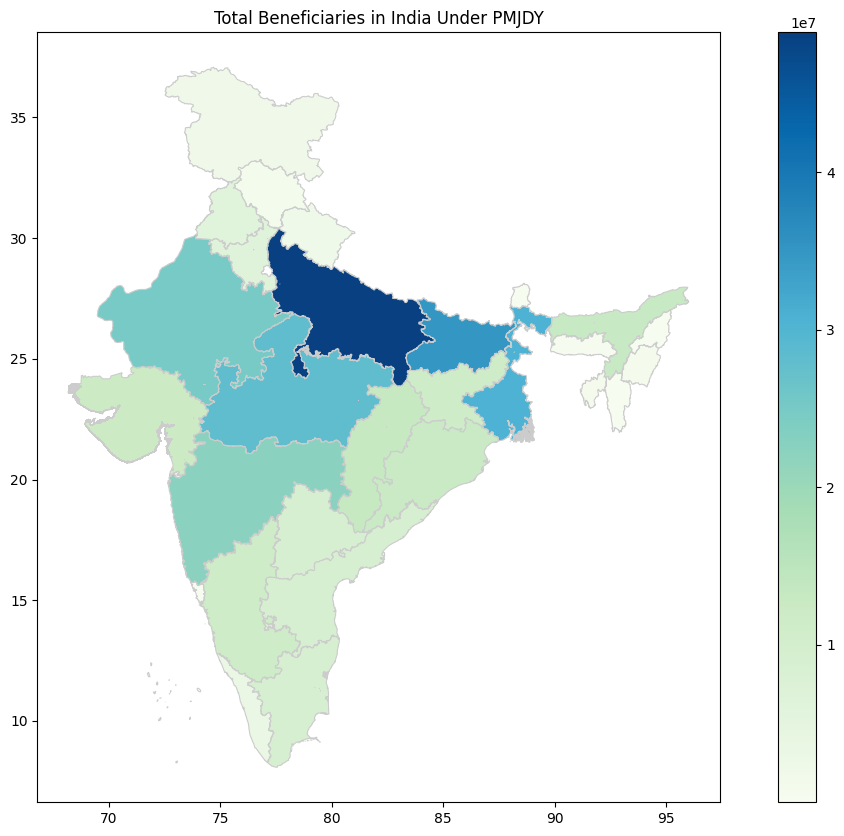

In [10]:
#Plotting on indian map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
if ax is not None:
    ax.set_title('Total Beneficiaries in India Under PMJDY')
    final_dataset.plot(column='Total Beneficiaries', cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Add a legend
    legend = ax.get_legend()
    if legend is not None:
        legend.set_title('Total Beneficiaries')

    # Show the plot
    plt.show()
else:
    print("Error creating axes.")